In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# General libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import streamlit as st
from os.path import exists
import os

# API Based Libraries
import pandas_market_calendars as mcal
from pandas_datareader import data as pdr
import yfinance as yf
import scipy as sc
yf.pdr_override()

# Reporting
import pyfolio as py

# module that refresh data
from modules.initial_data_load import refresh_data_tables
# import function for portfolio optimizer
from modules.sh_optimizer import portfolio_perform, port_std, neg_sharperatio, max_sf

#turn off warning signs for cleaner code
from warnings import filterwarnings
filterwarnings("ignore")

today = dt.date.today()

final_port_return = pd.read_csv(f"csv_files/optimizer_strategy_returns_{today}.csv", index_col=0, parse_dates=True, infer_datetime_format=True)

C:\Users\micha\anaconda3\envs\dev\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


<AxesSubplot:title={'center':'Annual returns'}, xlabel='Returns', ylabel='Year'>

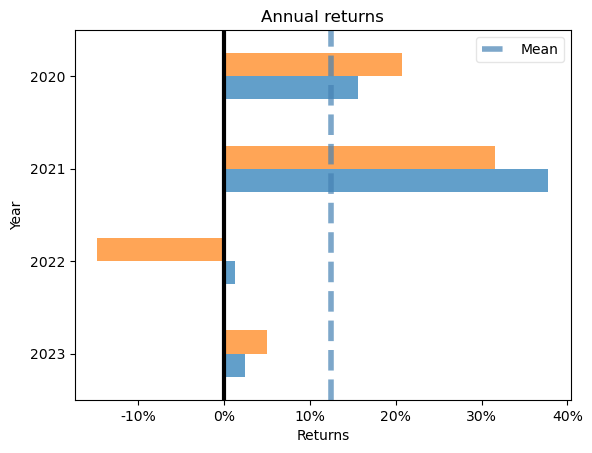

In [3]:
py.plot_annual_returns(final_port_return, xlabel = ['S&P 500', 'Portfolio'])

<AxesSubplot:ylabel='Cumulative returns'>

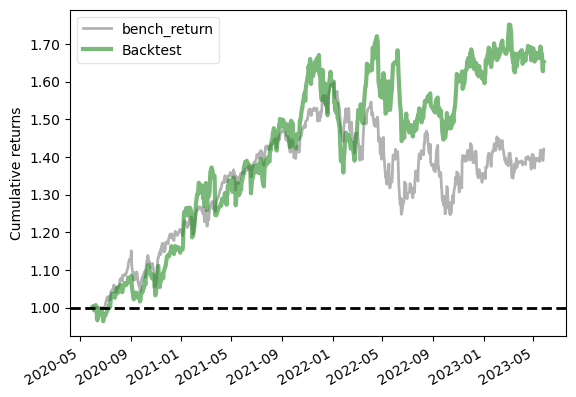

In [4]:
py.plot_rolling_returns(final_port_return['port_return'], factor_returns = final_port_return['bench_return'])

<AxesSubplot:title={'center':'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

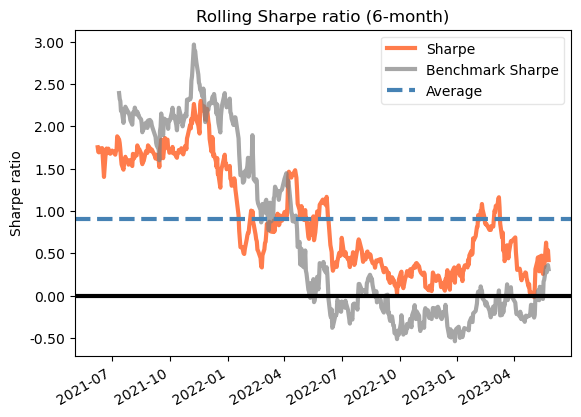

In [5]:
py.plot_rolling_sharpe(final_port_return['port_return'], factor_returns = final_port_return['bench_return'], rolling_window = 252, title='Rolling Sharpe Ratio (1-year)')

<AxesSubplot:title={'center':'Rolling volatility (6-month)'}, ylabel='Volatility'>

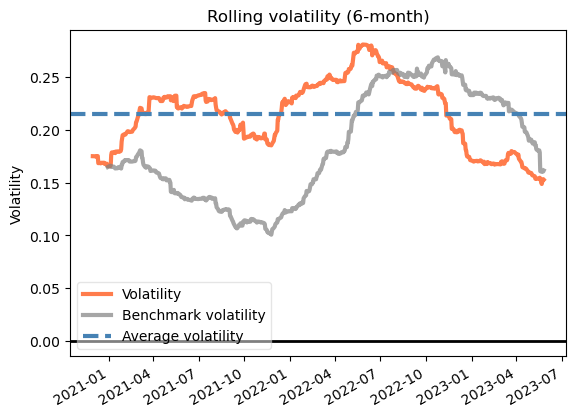

In [6]:
py.plot_rolling_volatility(final_port_return['port_return'], factor_returns = final_port_return['bench_return'], rolling_window=126)

Start date,2020-06-01
End date,2023-05-26
Total months,34
,Backtest
Annual return,18.884%
Cumulative returns,65.278%
Annual volatility,20.732%
Sharpe ratio,0.94
Calmar ratio,1.01
Stability,0.82
Max drawdown,-18.68%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,18.68,2021-11-29,2022-01-27,2022-04-08,95
1,16.19,2022-04-18,2022-06-17,2023-03-02,229
2,9.27,2021-03-15,2021-03-26,2021-06-02,58
3,7.25,2020-10-13,2020-10-30,2020-11-25,32
4,7.25,2023-03-03,2023-03-17,NaT,NaN


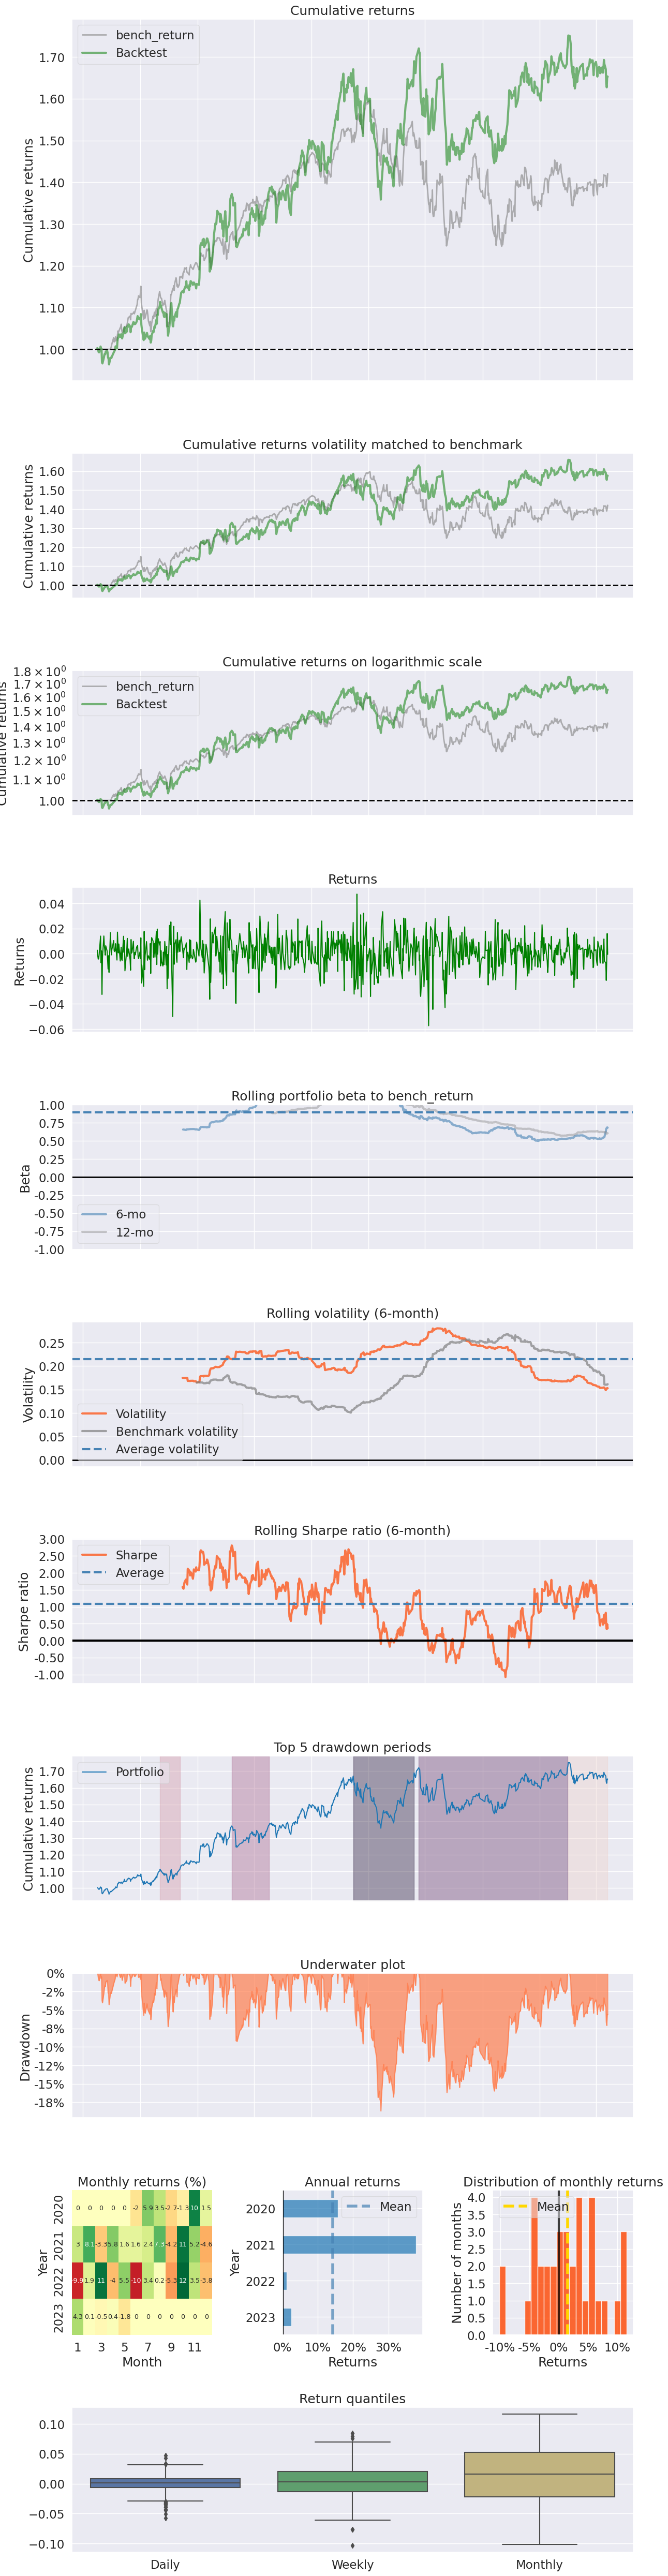

In [7]:
py.tears.create_returns_tear_sheet(final_port_return['port_return'], benchmark_rets = final_port_return['bench_return'])